# **Seoul Air Quality Historic Data (1988 ~ 2021)**

A continuacion se presenta el EDA del dataset que contiene informacion de la calidad del aire de seul desde 1988 a 2021 [Ver dataset aqui.](https://www.kaggle.com/datasets/williamhyun/seoulairqualityhistoricdata/data)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

In [ ]:
# Cargamos datos
file_path = '/content/drive/MyDrive/seoul_air_1988_2021.csv'
try:
  df = pd.read_csv(file_path)
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the CSV file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

           dt  loc        lat        long    so2    no2    co     o3  pm10  \
0  1988010100  103  37.540037  127.002661    NaN  0.007  10.3  0.000   NaN   
1  1988010100  105  37.593730  126.947561  0.340  0.055  12.6  0.043   NaN   
2  1988010100  107  37.542043  127.047497  0.399  0.046  13.4    NaN   NaN   
3  1988010100  108  37.547185  127.090304  0.261  0.034   5.4  0.000   NaN   
4  1988010100  113  37.654140  127.026801  0.443  0.039  14.6  0.000   NaN   

   pm2.5  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


Se escoje unicamente las columnas *$dt$*, *$loc$* y *$NO_2$* las cuales indican el año, mes, dia y hora de medicion y los niveles de Dioxido de nitrogeno en el aire en Seul.

In [ ]:
data=df[['dt','loc','no2']]
print('Column names:', data.columns)

Column names: Index(['dt', 'loc', 'no2'], dtype='object')


Se cuenta con 5984782 registros, sin embargo hay NAs presente

In [ ]:
print('Numero de filas y columnas: ', data.shape)

Numero de filas y columnas:  (5984782, 3)


In [ ]:
#Vemos cuantas observaciones hay en el subset
data.shape

(5984782, 3)

In [ ]:
#Queremos ver cuantos valores unicos de loc existen.
data['loc'].unique()

array([103, 105, 107, 108, 113, 117, 122, 124, 116, 106, 109, 110, 119,
       123, 101, 102, 104, 121, 111, 112, 114, 115, 118, 120, 125])

In [ ]:
#Vemos que punto de medicion tiene mas datos y lo escogemos
data['loc'].value_counts()

,count
loc,
124,288736
113,288596
103,283130
117,282384
122,282372
108,282314
107,280973
105,279064
116,262952


In [ ]:
ata=data[data['loc']==124]
data=data.drop(columns=['loc'])
data.shape

(288736, 2)

In [ ]:
data['no2'].describe()

,no2
count,281839.000000
mean,0.031775
std,0.017076
min,0.000000
25%,0.019000
50%,0.029000
75%,0.042000
max,0.687000


In [ ]:
data.loc[data['no2'] >0.6]

,dt,no2
68416,1989030822,0.687


In [ ]:
# REEMPLAZAMOS LOS VALORES (1) POR ENCIMA DE 0.6 COMO NAN
data.loc[data['no2'] > 0.6, 'no2'] = np.nan

In [ ]:
#Calculamos el numero de NA en el dataframe
print('El numero total de NA es de',data['no2'].isna().sum())
print('Esto corresponde al ', round(data['no2'].isna().sum()*100/data.shape[0],2),'% total de las observaciones')

El numero total de NA es de 6898
Esto corresponde al  2.39 % total de las observaciones


In [ ]:
#Imputamos los datos faltantes con interpolacion cuadratica

data['no2'] = data['no2'].interpolate(option='quadratic')

In [ ]:
print('Numero de datos faltantes luego de la imputacion: ', data['no2'].isna().sum())

Numero de datos faltantes luego de la imputacion:  0


In [ ]:
# Resumen de NO2 despues de imputar
data['no2'].describe()

,no2
count,288736.000000
mean,0.031783
std,0.017060
min,0.000000
25%,0.019000
50%,0.029000
75%,0.042000
max,0.204000


<ipython-input-19-ada2cf4c6db9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(data['no2'], norm_hist=False)


Text(0.5, 0, 'Niveles de NO2')

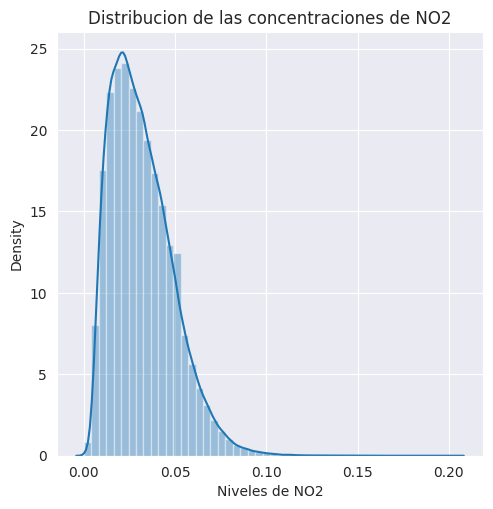

In [ ]:
#Graficamos la distribucion de concentraciones de NO2 en un histograma.
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(data['no2'], norm_hist=False)
g.set_title('Distribucion de las concentraciones de NO2');
plt.xlabel("Niveles de NO2")

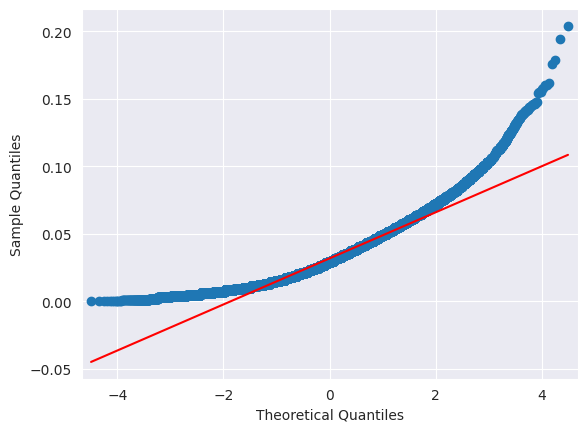

In [ ]:
#Hacemos un grafico de cuantiles para ver si existe normalidad
from statsmodels.graphics.gofplots import qqplot
qqplot(data['no2'], line='s')
plt.gca().get_lines()[1].set_color('red')
plt.show()

In [ ]:
#Comprobamos con una prueba que Los datos no son normales

from scipy.stats import shapiro

print('Shapiro-Wilk Test:')
stat, p = shapiro(data['no2'])
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Shapiro-Wilk Test:
Statistics=0.949551, p=3.083672e-114
Sample does not look Normal (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 288736.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Cambiamos el formato de la fecha

data['dt'] = pd.to_datetime(data['dt'].astype(str), format='%Y%m%d%H')

#establecer 'dt' como índice
data.set_index('dt', inplace=True)



In [ ]:
# Se generan las medias diarias
daily = data['no2'].resample('D')
daily_mean = daily.mean()

monthly = data['no2'].resample('M')
monthly_mean = monthly.mean()

<ipython-input-23-470424d8b25e>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data['no2'].resample('M')


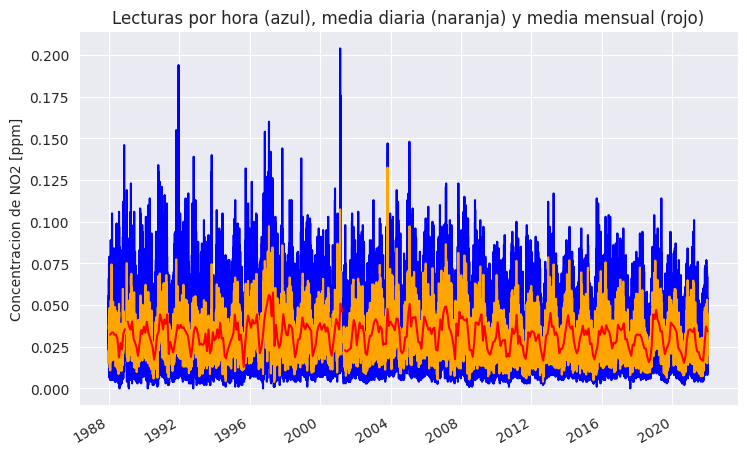

In [ ]:
#Grafico de mediciones completas vs medias diarias
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.add_subplot(1,1,1)
data['no2'].plot(ax=ax, color='blue')
daily_mean.plot(ax=ax, color='orange')
monthly_mean.plot(ax=ax, color='red')
ax.set_title('Lecturas por hora (azul), media diaria (naranja) y media mensual (rojo)');
ax.set_xlabel('');
ax.set_ylabel('Concentracion de NO2 [ppm]');

In [ ]:
#Calculamos una media movil semanal con un rolling de tamaño 7 para las medias diarias
weekly_moving_average = daily_mean.rolling(7).mean()


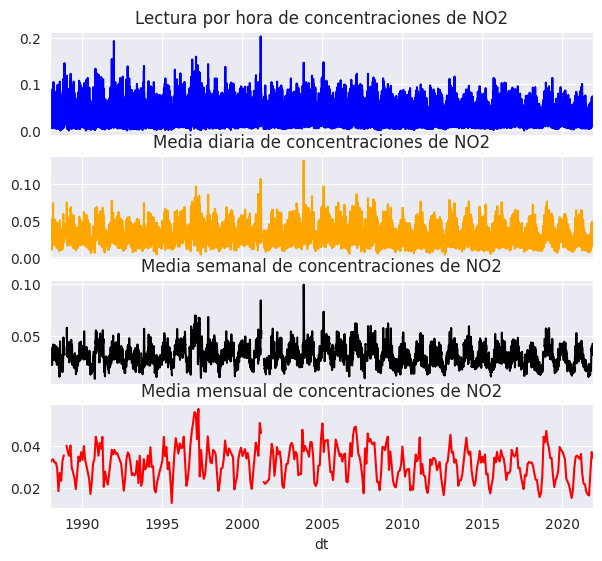

In [ ]:
#Graficamos las lecturas segun los diferentes umbrales de tiempo
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(7, 7)


data['no2'].plot(ax=axarr[0], color='blue')
axarr[0].set_title('Lectura por hora de concentraciones de NO2');

daily_mean.plot(ax=axarr[1], color='orange')
axarr[1].set_title('Media diaria de concentraciones de NO2');

weekly_moving_average.plot(ax=axarr[2], color='black')
axarr[2].set_title('Media semanal de concentraciones de NO2');

monthly_mean.plot(ax=axarr[3], color='red')
axarr[3].set_title('Media mensual de concentraciones de NO2');

<Axes: xlabel='dt'>

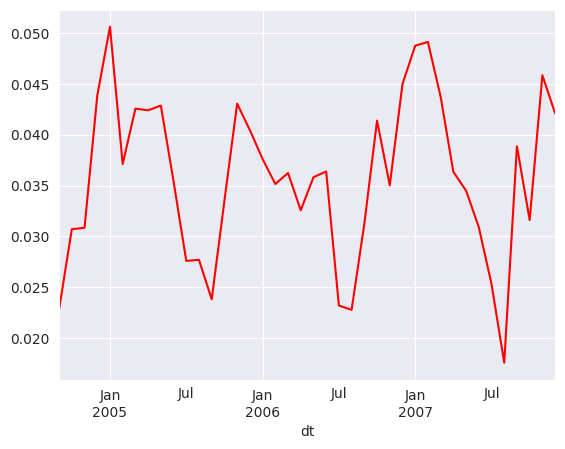

In [ ]:
#Hacemos un zoom de los datos con media mensual
monthly_mean[200:240].plot(color='red')

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
# Ajustamos la línea de tendencia.
#Para ello importamos la clase LinearRegression de scikit-learn y ajustamos un modelo lineal al índice temporal
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['no2'])

LinearRegression()

In [ ]:
#Coeficientes del modelo
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=-1.2527556778387919e-08 and intercept=0.033591325156384674


In [ ]:
# Residuales obtenido a partir del modelo de línea de tendencia
residuals = np.array(data['no2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))


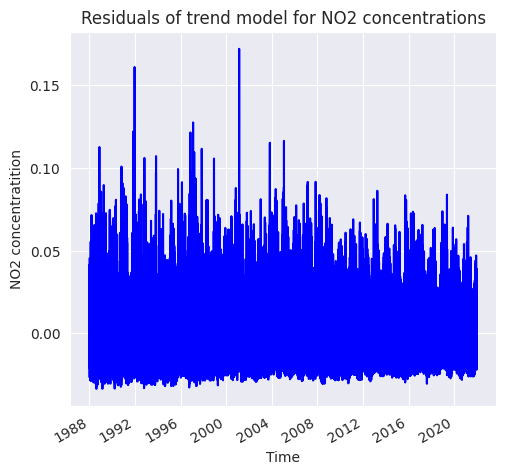

In [ ]:
# Grafico de los residuales

plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for NO2 concentrations')
plt.xlabel('Time')
plt.ylabel('NO2 concentratition')
plt.xticks(rotation=30);

# **Gráfico de subserie estacional**

In [ ]:
#Creamos las columnas month ,year, residual y quarter para futuros analisis
data['month'] = data.index.month
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['month'].map(lambda m: month_quarter_map.get(m))

In [ ]:
data['Year'] = data.index.year


In [ ]:
data.head()

,no2,month,Residuals,Quarter,Year
dt,,,,,
1988-01-01 00:00:00,0.036,1,0.002409,Q1,1988
1988-01-01 01:00:00,0.034,1,0.000409,Q1,1988
1988-01-01 02:00:00,0.031,1,-0.002591,Q1,1988
1988-01-01 03:00:00,0.033,1,-0.000591,Q1,1988
1988-01-01 04:00:00,0.032,1,-0.001591,Q1,1988


In [ ]:
# Se calculan la media estacional y las desviaciones típicas, agrupando los datos por Year y Quarter.

seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

<ipython-input-36-9376be1228fc>:3: FutureWarning: The provided callable <function mean at 0x7f4386521580> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
<ipython-input-36-9376be1228fc>:3: FutureWarning: The provided callable <function std at 0x7f43865216c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])


In [ ]:
# Creamos índices de filas de seasonal_sub_series_data utilizando Year & Quarter

seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1988-Q1,1988,Q1,-0.000493,0.015017
1988-Q2,1988,Q2,-0.002120,0.015765
1988-Q3,1988,Q3,-0.010554,0.014644
1988-Q4,1988,Q4,0.000293,0.016284
1989-Q1,1989,Q1,0.003999,0.016259


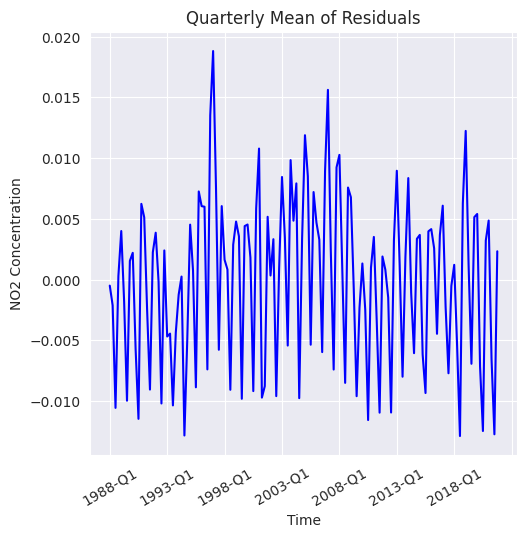

In [ ]:
#Graficamos los residuales de las medias trimestrales
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('NO2 Concentration')
plt.xticks(rotation=30);

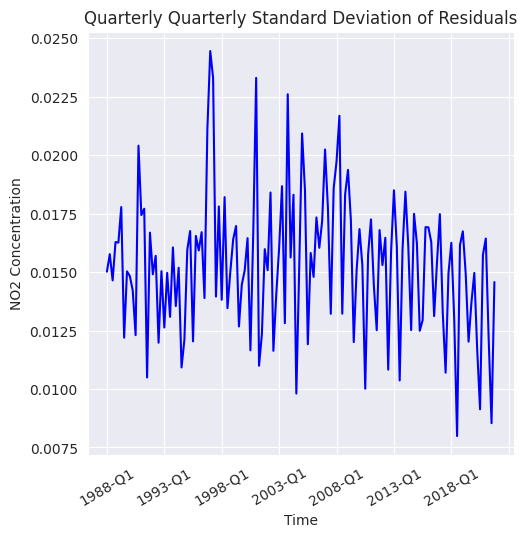

In [ ]:
#Graficamos las desviaciones estandar de las medias trimestrales

plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('NO2 Concentration')
plt.xticks(rotation=30);

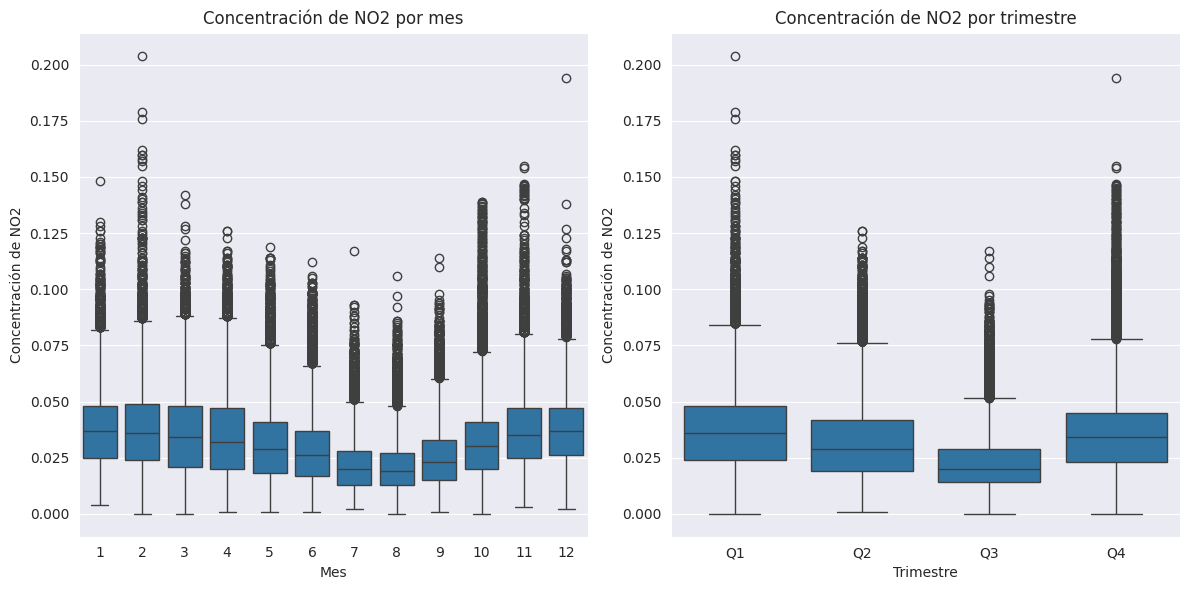

In [ ]:
plt.figure(figsize=(12, 6))

# Primer gráfico (Concentración de NO2 por mes)
plt.subplot(1, 2, 1)  # (filas, columnas, índice de gráfico)
g = sns.boxplot(data=data[data['Year'] > 1974], y='no2', x='month')
g.set_title('Concentración de NO2 por mes')
g.set_xlabel('Mes')
g.set_ylabel('Concentración de NO2')

# Segundo gráfico (Concentración de NO2 por trimestre)
plt.subplot(1, 2, 2)  # (filas, columnas, índice de gráfico)
g = sns.boxplot(data=data[data['Year'] > 1974], y='no2', x='Quarter')
g.set_title('Concentración de NO2 por trimestre')
g.set_xlabel('Trimestre')
g.set_ylabel('Concentración de NO2')

# Muestra los gráficos
plt.tight_layout()  # Ajusta el espacio entre gráficos para que no se solapen
plt.show()

In [ ]:
#Comparacion de medias por trimestre
from scipy import stats

grouped = [group['no2'].values for name, group in data.groupby('Quarter')]

# Realizar la prueba ANOVA de un solo factor
f_statistic, p_value = stats.f_oneway(*grouped)

# Mostrar los resultados
print(f"Estadístico F: {f_statistic}")
print(f"Valor p: {p_value}")

Estadístico F: 11670.487907964542
Valor p: 0.0


# **FUNCION DE AUTOCORRELACION**

In [ ]:
#Verificamos la presencia de NAN
monthly_mean.isna().sum()

2

In [ ]:
monthly_mean.dropna(inplace=True)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
lag = range(0,1000)
no2_acf = []
for l in lag:
    no2_acf.append(data['no2'].autocorr(l))

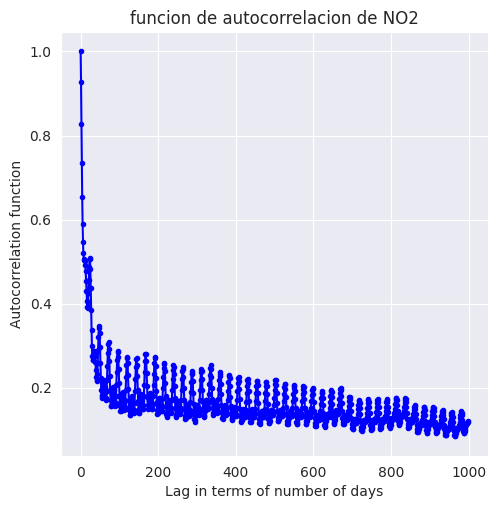

In [ ]:
#ACF por hora
plt.figure(figsize=(5.5, 5.5))
plt.plot(no2_acf, marker='.', color='b')
plt.title('funcion de autocorrelacion de NO2')
plt.xlabel('Lag in terms of number of days')
plt.ylabel('Autocorrelation function');

In [ ]:
lag = range(0,400)
no2_acf_mensual = []
for l in lag:
    no2_acf_mensual.append(monthly_mean.autocorr(l))

In [ ]:
!pip install --upgrade statsmodels matplotlib

<Figure size 550x550 with 0 Axes>

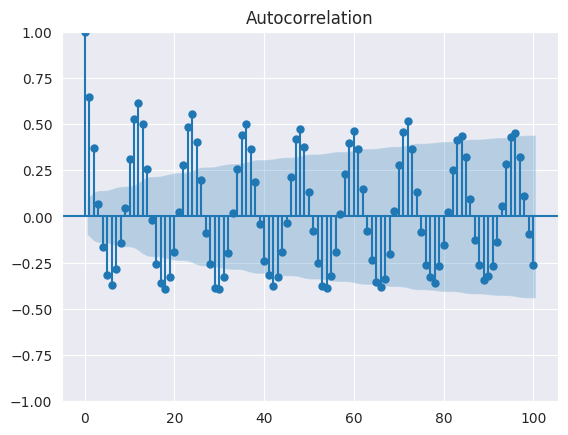

In [ ]:
#ACF por media mensual
plt.figure(figsize=(5.5, 5.5));
plot_acf(monthly_mean, lags=100);

<Figure size 550x550 with 0 Axes>

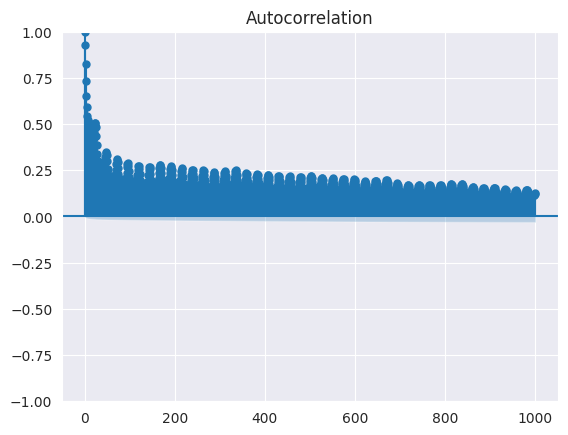

In [ ]:
#ACF por hora
plt.figure(figsize=(5.5, 5.5));
plot_acf(data['no2'], lags=1000);

<Figure size 550x550 with 0 Axes>

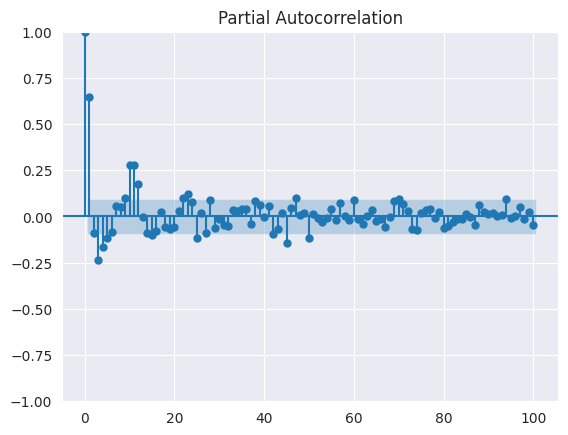

In [ ]:
#PACF datos por media mensual

plt.figure(figsize=(5.5, 5.5));
plot_pacf(monthly_mean, lags=100);

<Figure size 550x550 with 0 Axes>

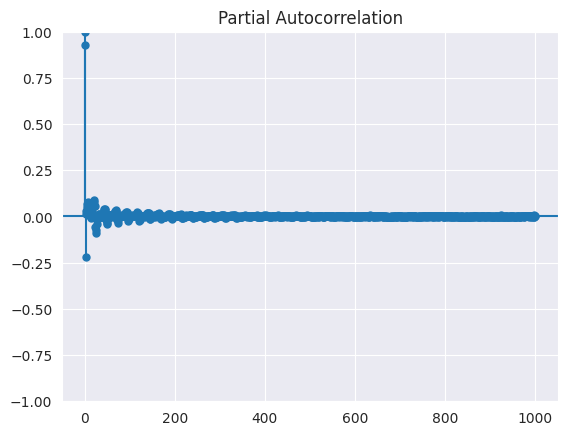

In [ ]:
#PACF datos por hora
plt.figure(figsize=(5.5, 5.5));
plot_pacf(data['no2'], lags=1000);

In [ ]:
# Instalamos LaTex para las graficas
!apt-get install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

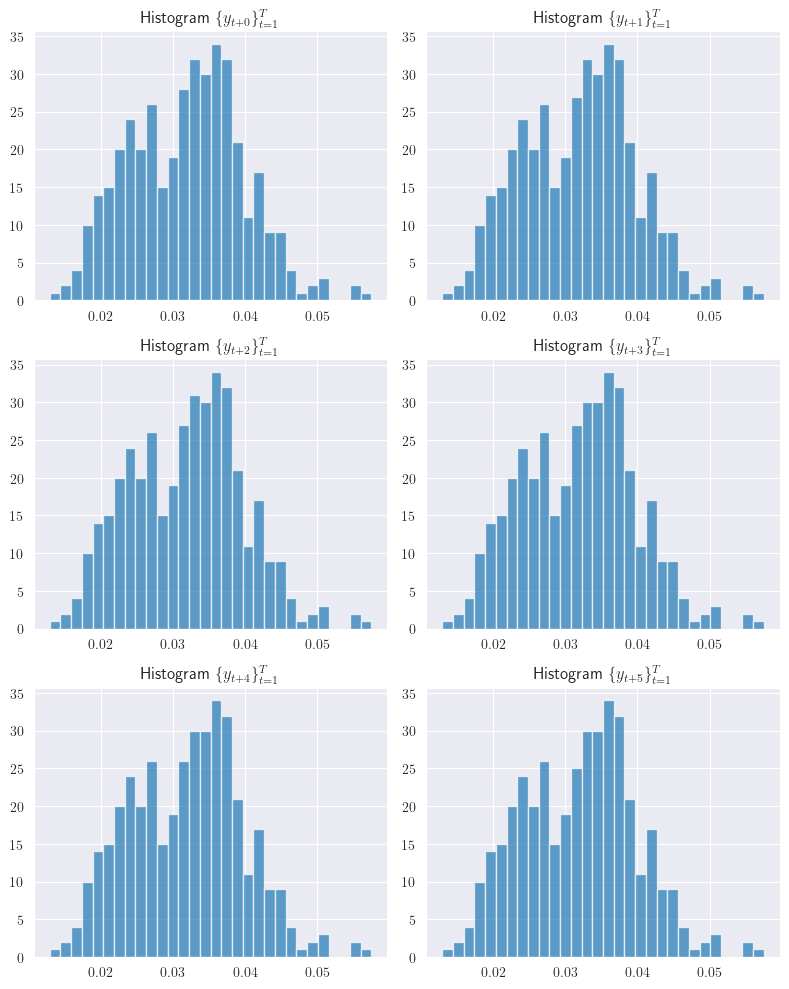

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.rcParams['text.usetex'] = True  # Activa LaTeX para los títulos

fig, axs = plt.subplots(3, 2, figsize=(8, 10))  # Crea una cuadrícula de 3x2 gráficos

for i, ax in enumerate(axs.flat):
    ax.hist(monthly_mean.iloc[i:], bins=30, alpha=0.7)  # Histograma con subconjuntos de 'no2'
    ax.set_title(r'Histogram $\{y_{t+%d}\}_{t=1}^{T}$' % (i))  # Título en LaTeX

plt.tight_layout()  # Ajusta la distribución de los gráficos
plt.show()  # Muestra la figura

plt.rcParams['text.usetex'] = False  # Desactiva LaTeX


In [ ]:
#vemos si hay valores faltantes en la variable monthly_mean
monthly_mean.isna().sum()

0

In [ ]:
monthly_mean = monthly_mean.interpolate(option='quadratic')

In [ ]:
#calculamos diferencias de primer orden para la media mensual
first_order_diff =monthly_mean.diff(1)
first_order_diff=first_order_diff[1:]

In [ ]:
#calculamos diferencias de orden 12 para la media mensual

seasonal_diff = monthly_mean.diff(12)
seasonal_diff = seasonal_diff[12:]

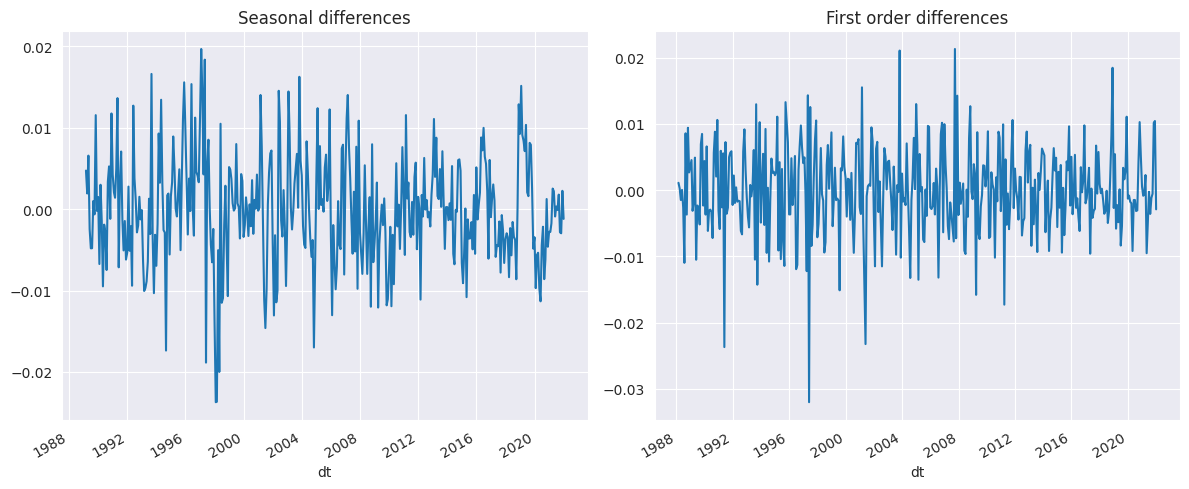

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Títulos para los subgráficos
axs[0].set_title('Seasonal differences')
axs[1].set_title('First order differences')

# Dibujar los gráficos en los subgráficos correspondientes
seasonal_diff.plot(ax=axs[0])
first_order_diff.plot(ax=axs[1])

# Ajustar la disposición de los subgráficos para que no se sobrepongan
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()

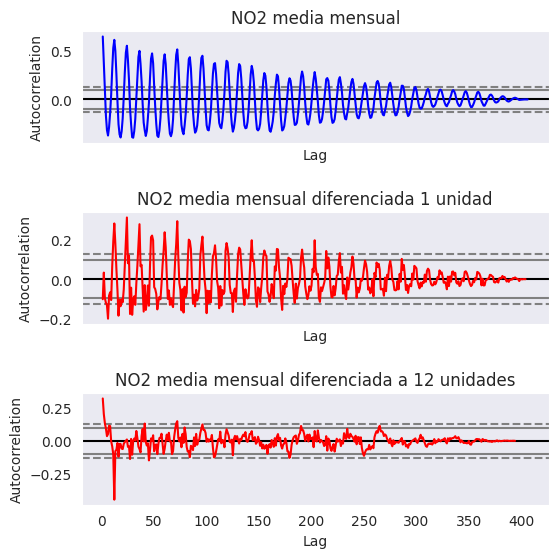

In [ ]:
fig, ax = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(monthly_mean, color='b', ax=ax[0])
ax[0].set_title('NO2 media mensual')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('NO2 media mensual diferenciada 1 unidad')
autocorrelation_plot(seasonal_diff, color='r', ax=ax[2])
ax[2].set_title('NO2 media mensual diferenciada a 12 unidades')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)



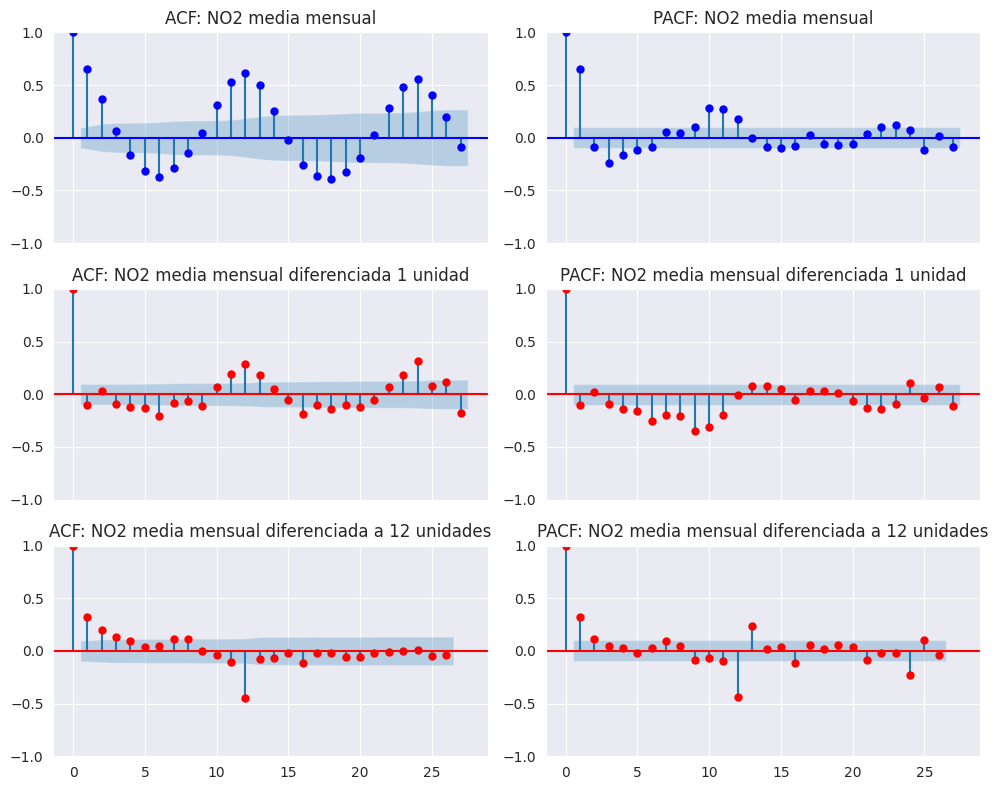

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 8), sharex=True)

# ACF Plots
plot_acf(monthly_mean, color='b', ax=ax[0, 0])
ax[0, 0].set_title('ACF: NO2 media mensual')

plot_acf(first_order_diff.iloc[1:], color='r', ax=ax[1, 0])
ax[1, 0].set_title('ACF: NO2 media mensual diferenciada 1 unidad')

plot_acf(seasonal_diff, color='r', ax=ax[2, 0])
ax[2, 0].set_title('ACF: NO2 media mensual diferenciada a 12 unidades')

# PACF Plots
plot_pacf(monthly_mean, color='b', ax=ax[0, 1])
ax[0, 1].set_title('PACF: NO2 media mensual')

plot_pacf(first_order_diff.iloc[1:], color='r', ax=ax[1, 1])
ax[1, 1].set_title('PACF: NO2 media mensual diferenciada 1 unidad')

plot_pacf(seasonal_diff, color='r', ax=ax[2, 1])
ax[2, 1].set_title('PACF: NO2 media mensual diferenciada a 12 unidades')

plt.tight_layout()
plt.show()

# **PRUEBA DE DICKEY FULLER**

In [ ]:
from statsmodels.tsa import stattools


In [ ]:
#Prueba de D. Fuller
adf_result = stattools.adfuller(monthly_mean, autolag='AIC')
adf_result_seasonal = stattools.adfuller(seasonal_diff, autolag='AIC')



In [ ]:
#Dado que el p valor es menor al nivel de significancia se rechaza H0 en favor de la alternativa, es decir la variable es estacionaria
print('p-val of the ADF test in no2 concentration:', adf_result[1])
print('p-val of the ADF test in no2 concentration :', adf_result_seasonal[1])

p-val of the ADF test in no2 concentration: 0.02427572338524338
p-val of the ADF test in no2 concentration : 3.241679528485828e-07


# **Descomposición de series temporales mediante medias móviles**


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

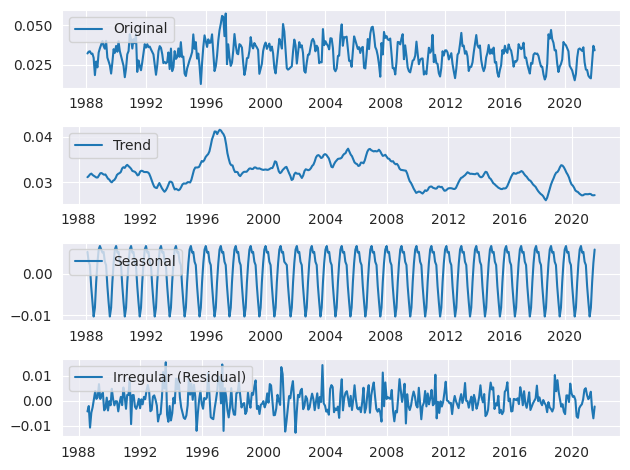

In [ ]:
decomposition = seasonal_decompose(monthly_mean, model='additive', period=12)

plt.figure()
plt.subplot(411)
plt.plot(monthly_mean, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Irregular (Residual)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
monthly